# Posttest 8
# Mengimport Library

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Melihat Data

In [138]:
data = pd.read_csv('chinese_mnist.csv')

In [139]:
data.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [140]:
data.dtypes

suite_id      int64
sample_id     int64
code          int64
value         int64
character    object
dtype: object

# Data Spliting

In [187]:
X = data[['sample_id','code', 'value', 'suite_id']]
Y = data[['sample_id','code','value', 'suite_id']]

In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1 , random_state = 0)

In [164]:
X_train.shape

(13500, 3)

In [165]:
X_test.shape

(1500, 3)

In [166]:
Y_train.shape

(13500, 3)

In [167]:
Y_test.shape

(1500, 3)

# Model Sequential

In [189]:
model_data = Sequential()

In [190]:
# Membuat Input Layer
model_data.add(Dense(512, activation='relu', input_dim = 4))

In [191]:
# Membuat Hidden Layer
model_data.add(Dense(256, activation='relu'))
model_data.add(Dense(128, activation='relu'))


In [192]:
# membuat Output layer
model_data.add(Dense(4, activation='sigmoid'))

In [193]:
# Model Summary
model_data.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               2560      
                                                                 
 dense_38 (Dense)            (None, 256)               131328    
                                                                 
 dense_39 (Dense)            (None, 128)               32896     
                                                                 
 dense_40 (Dense)            (None, 4)                 516       
                                                                 
Total params: 167,300
Trainable params: 167,300
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Compile Data

In [195]:
model_data.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [196]:
hasil = model_data.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/10
106/106 [==============================] - 1s 5ms/step - loss: 616134344704.0000 - accuracy: 0.2863 - val_loss: 473851527168.0000 - val_accuracy: 0.2447
Epoch 2/10
106/106 [==============================] - 0s 3ms/step - loss: 3185198759936.0000 - accuracy: 0.2691 - val_loss: 7893106032640.0000 - val_accuracy: 0.2447
Epoch 3/10
106/106 [==============================] - 0s 3ms/step - loss: 21233886298112.0000 - accuracy: 0.2691 - val_loss: 36780678053888.0000 - val_accuracy: 0.2447
Epoch 4/10
106/106 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.1104 - val_loss: nan - val_accuracy: 0.0293
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0253 - val_loss: nan - val_accuracy: 0.0293
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0253 - val_loss: nan - val_accuracy: 0.0293
Epoch 7/10
106/106 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.02

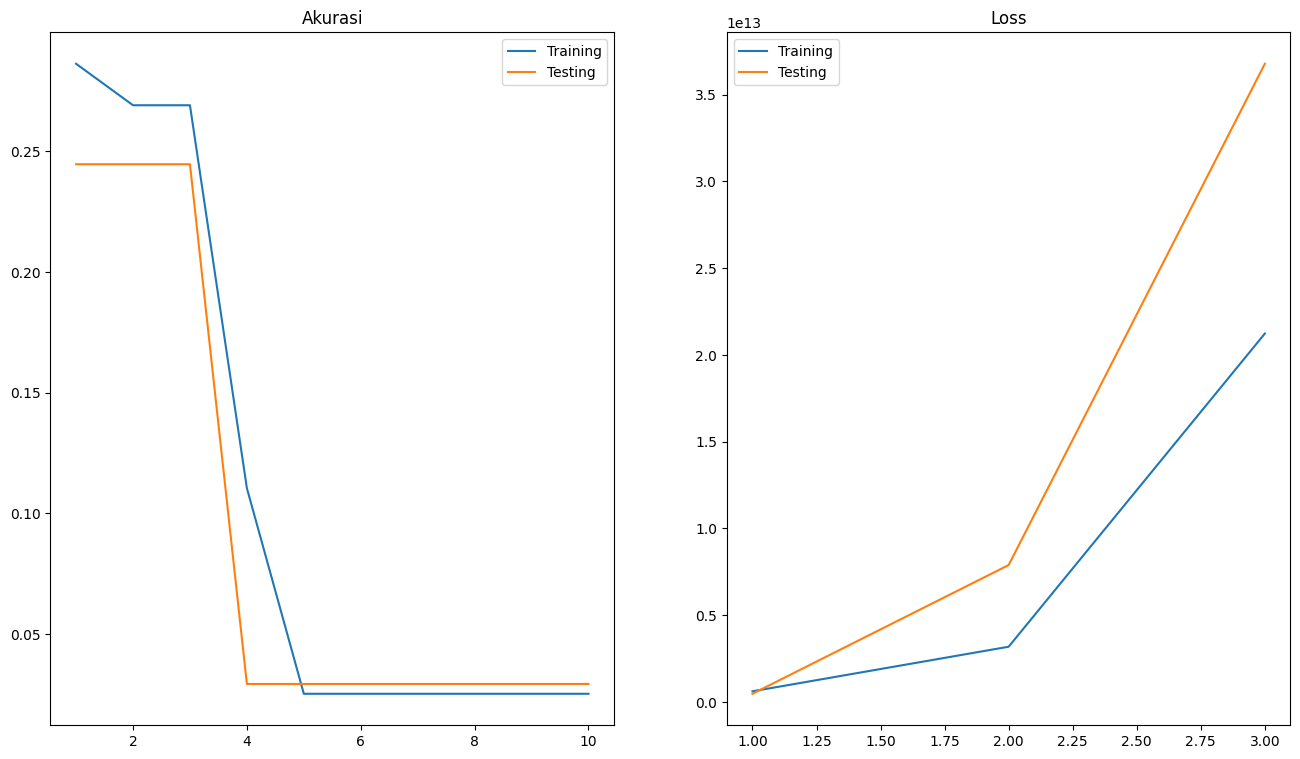

In [197]:
plt.figure(figsize=(16,9))

epochs_run = [i+1 for i in range(10)]

# Akurasi
plt.subplot(1,2,1)
plt.plot(epochs_run, hasil.history['accuracy'], label='Training')
plt.plot(epochs_run, hasil.history['val_accuracy'], label='Testing')
plt.title("Akurasi")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs_run, hasil.history['loss'], label='Training')
plt.plot(epochs_run, hasil.history['val_loss'], label='Testing')
plt.title("Loss")
plt.legend()

plt.show()

In [198]:
score = model_data.evaluate(X_test, Y_test)
print("Loss :",score[0])
print("Training :",score[1])

47/47 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0293
Loss : nan
Training : 0.029333332553505898


In [199]:
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")
print("Akurasi :", hasil.history["accuracy"][-1] * 100, "%")

Akurasi validasi : 2.9333332553505898 %
Akurasi : 2.5259260088205338 %
